In [1]:
from simulation import Simulation
from objective_func import stimulate, f
from genetic_algorithm import genetic_algorithm
from cross_entropy import cross_entropy_method
from random_exploration import random_exploration
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
from experiment_params import *

In [3]:
b2.start_scope()
best_stim, score_hist = genetic_algorithm(t_max, m, k, crossover_rate, mutation_rate, ga_sigma)
# best_stim, score_hist = cross_entropy_method(t_max, ce_sigma)
# best_stim, score_hist = random_exploration(t_max)
print(best_stim)
print(score_hist)

Generation:  0
[[-1.67109971  0.83620358  1.29456681  1.0129044  -0.85582762  1.5056932
   0.55511458 -0.30577228]
 [-0.53915078  1.61716976 -1.27809162  0.41116866 -1.01886572 -0.78788972
  -0.79501438  0.14417898]
 [-0.55887814 -0.76300089 -0.24489308 -0.04087939  0.36090693 -0.3380793
   0.14446492 -1.08783948]
 [ 0.3166892  -1.63532901  0.18259341  0.72789025  1.02762429  1.56136299
   0.01553988  0.51254179]
 [ 1.23433417 -0.48469146  1.23058564  0.11473545  0.32336031  0.03374063
  -0.06763834 -0.95617261]
 [ 2.81380593 -0.0749442   0.90523894 -2.17459794 -0.21954829  1.98559812
  -1.12939524 -0.8721288 ]
 [-0.65468186 -0.53733857  0.10152104  0.63893143 -0.85512283  0.88951582
   0.74780615  0.49309261]
 [ 0.56428121  0.40012664 -0.76894006 -0.45236366  1.25571722 -0.10850692
  -0.61053328  1.28172688]
 [-0.19063691  1.35551503  1.31206455  0.28887279 -0.88706515 -0.78695071
   0.61689192  0.03965601]
 [-0.86603355  0.11298464 -1.76438985  3.15836229 -1.32147359 -0.60574915
  -0

In [3]:
# sanity check
stim_pattern = np.array(best_stim) * b2.nA
statemon, spikemon, ratemon = stimulate(synapse_w, stim_pattern)
print(spikemon.count)
eval = f(np.array(spikemon.count), target_pattern)
print(eval)

<spikemonitor.count: array([1, 0, 1, 1, 1, 0, 0, 1])>
1


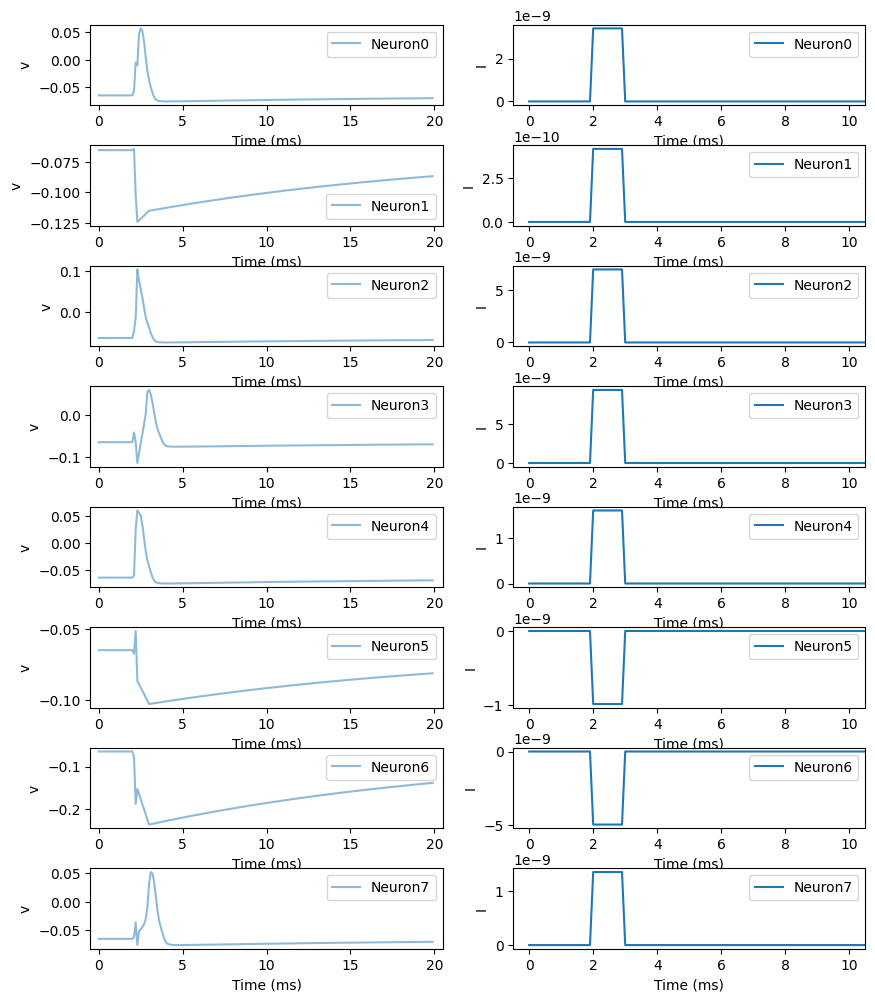

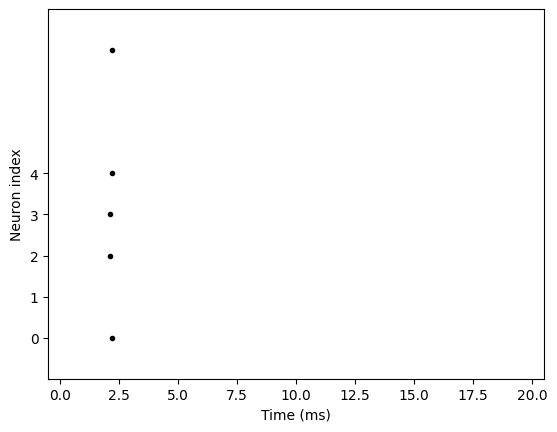

In [4]:
color = ['r', 'g', 'b', 'y', 'c']
duration = 20*b2.ms
# plot
plt.figure(figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)
for i in range(num_neurons):
    plt.subplot(num_neurons,2,i*2+1)
    plt.plot(statemon.t/b2.ms, statemon.v[i], label='Neuron'+str(i), alpha=0.5)
    # plt.ylim(-0.1, 0.09)
    plt.xlim(-0.5, int(duration/b2.ms)+0.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('v')
    plt.legend()

    plt.subplot(num_neurons,2,i*2+2)
    plt.plot(statemon.t/b2.ms, statemon.I[i], label='Neuron'+str(i))
    # plt.ylim(-80/1000, 80/1000)
    plt.xlim(-0.5, 10.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('I')
    plt.legend()
plt.savefig('ap_02.png')
plt.show()
# plt.subplot(7,2,13)
plt.plot(spikemon.t/b2.ms, spikemon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.ylim(-1, num_neurons)
plt.xlim(-0.5, int(duration/b2.ms)+0.5)
plt.yticks([0, 1, 2, 3, 4])
plt.savefig('spiketrain_02.png')
plt.show()

In [5]:
# Synapse weights
synapse_w = np.random.uniform(-50, 50, (num_neurons, num_neurons))
# set the diagonal to 0 (no self-connection)
synapse_w = synapse_w - np.diag(np.diag(synapse_w))
print(synapse_w)

[[  0.         -39.79188662  29.509397   -48.61730256   9.02001661
   -3.86013655  -8.3310131   -8.60848628]
 [-19.12017013   0.          -0.32308873 -22.3298143    8.49016185
   16.7511104   29.27966167 -17.00235549]
 [ -7.83567986  24.39206249   0.          -4.9881155    3.29209641
   46.54484553 -47.08567846 -31.47303136]
 [  0.0986074   27.98163259  29.9990325    0.         -32.24729389
   40.7042631   -7.47958798  13.50605893]
 [  2.41687967 -47.4204297   38.03383317   0.39426147   0.
   43.00759027 -40.44627207 -28.75008651]
 [ 17.21751093  12.90999049  -2.62516221  23.21916598 -18.22520513
    0.          -4.50925721 -34.21765085]
 [-26.01880231 -32.82134028  46.01778383  40.58749954  45.09762102
  -49.69709835   0.         -36.33554125]
 [ 34.26457203   9.30312914  -9.55398294  18.31370574  31.70842147
   42.45375242  44.4000709    0.        ]]
